<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/ImageClassificationforDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## sprint datasetの作成

### 【問題1】自作データセットでの分類の学習

1.モデルの構築に必要な TensorFlow と Keras クラスをインポート

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

import os
import numpy as np
import matplotlib.pyplot as plt
import glob 
import re
from PIL import Image
%matplotlib inline

2.データの読み込み

データセットのダウンロードから始めます。このチュートリアルでは、 Kaggle の Dogs vs Cats データセットをフィルタリングしたバージョンを\
使用します。データセットのアーカイブバージョンをダウンロードし、"/tmp/"ディレクトリに保存します。

In [ ]:
PATH = 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/'

In [ ]:
print(PATH)

C:/Users/es/Documents/Python Scripts/3.Mar/dataset/


```py
データセットのディレクトリ構造
dataset
|__ training
    |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ validation
    |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
```

3.学習および検証セットのための適切なファイルパスで変数を設定

In [ ]:
train_dir = os.path.join(PATH, 'training')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
print(train_dir)
print(validation_dir)

C:/Users/es/Documents/Python Scripts/3.Mar/dataset/training
C:/Users/es/Documents/Python Scripts/3.Mar/dataset/validation


In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 学習用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 検証用の犬画像のディレクトリ

In [ ]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

C:/Users/es/Documents/Python Scripts/3.Mar/dataset/training\cats
C:/Users/es/Documents/Python Scripts/3.Mar/dataset/training\dogs
C:/Users/es/Documents/Python Scripts/3.Mar/dataset/validation\cats
C:/Users/es/Documents/Python Scripts/3.Mar/dataset/validation\dogs


4.データの理解

学習および検証ディレクトリの中にある猫と犬の画像の数を確認

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 3
total training dog images: 3
total validation cat images: 2
total validation dog images: 2
--
Total training images: 6
Total validation images: 4


5.画像データを読み込み、データ準備を行う。

In [ ]:
img_list_t_cats = glob.glob(train_cats_dir + '/*' + ".jpg")
img_list_t_dogs = glob.glob(train_dogs_dir + '/*' + ".jpg")
img_list_v_cats = glob.glob(validation_cats_dir + '/*' + ".jpg")
img_list_v_dogs = glob.glob(validation_dogs_dir + '/*' + ".jpg")

In [ ]:
print(img_list_t_cats)
print(img_list_t_dogs)
print(img_list_v_cats)
print(img_list_v_dogs)

['C:/Users/es/Documents/Python Scripts/3.Mar/dataset/training\\cats\\cat1.jpg', 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/training\\cats\\cat2.jpg', 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/training\\cats\\cat3.jpg']
['C:/Users/es/Documents/Python Scripts/3.Mar/dataset/training\\dogs\\dog1.jpg', 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/training\\dogs\\dog2.jpg', 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/training\\dogs\\dog3.jpg']
['C:/Users/es/Documents/Python Scripts/3.Mar/dataset/validation\\cats\\cat4.jpg', 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/validation\\cats\\cat5.jpg']
['C:/Users/es/Documents/Python Scripts/3.Mar/dataset/validation\\dogs\\dog4.jpg', 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/validation\\dogs\\dog5.jpg']


In [ ]:
# 学習用のイメージリストを作成する。

t_img_array = np.empty((0,224,224,3))

for img in img_list_t_cats:
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        t_img_array = np.concatenate([t_img_array, cat_img], axis = 0)
        
        cat_img_.close()

for img in img_list_t_dogs:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        t_img_array = np.concatenate([t_img_array, dog_img], axis = 0)
        
        dog_img_.close()

In [ ]:
# 検証用のイメージリストを作成する。

IMG_HEIGHT = 224
IMG_WIDTH = 224
v_img_array = np.empty((0,224,224,3))

for img in img_list_v_cats:
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        v_img_array = np.concatenate([v_img_array, cat_img], axis = 0)
        
        cat_img_.close()

for img in img_list_v_dogs:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        v_img_array = np.concatenate([v_img_array, dog_img], axis = 0)
        
        dog_img_.close()

In [ ]:
t_img_array.shape

(6, 224, 224, 3)

In [ ]:
v_img_array.shape

(4, 224, 224, 3)

In [ ]:
v_img_array[0][0][0]

array([0.78823529, 0.51372549, 0.25882353])

5.便宜上、データセットの前処理およびネットワークの学習中に使用する変数を設定

In [ ]:
batch_size = 1
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

8.学習用画像の可視化

学習用のジェネレータから画像バッチを抽出して可視化します。（この例では32個の画像を抽出し、そのうち5つを matplotlib で描画します。）

In [ ]:
X_train = t_img_array
X_val = v_img_array

In [ ]:
y_train = np.array([0,0,0,1,1,1])
y_val = np.array([0,0,1,1])

next 関数はデータセットからバッチを返します。 next 関数の返り値は （x_train、y_train） の形式で、 x_train は学習用の特徴量、\
y_train はそのラベルです。

9.ラベルを破棄して、学習用画像の可視化のみを行います。

In [ ]:
# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

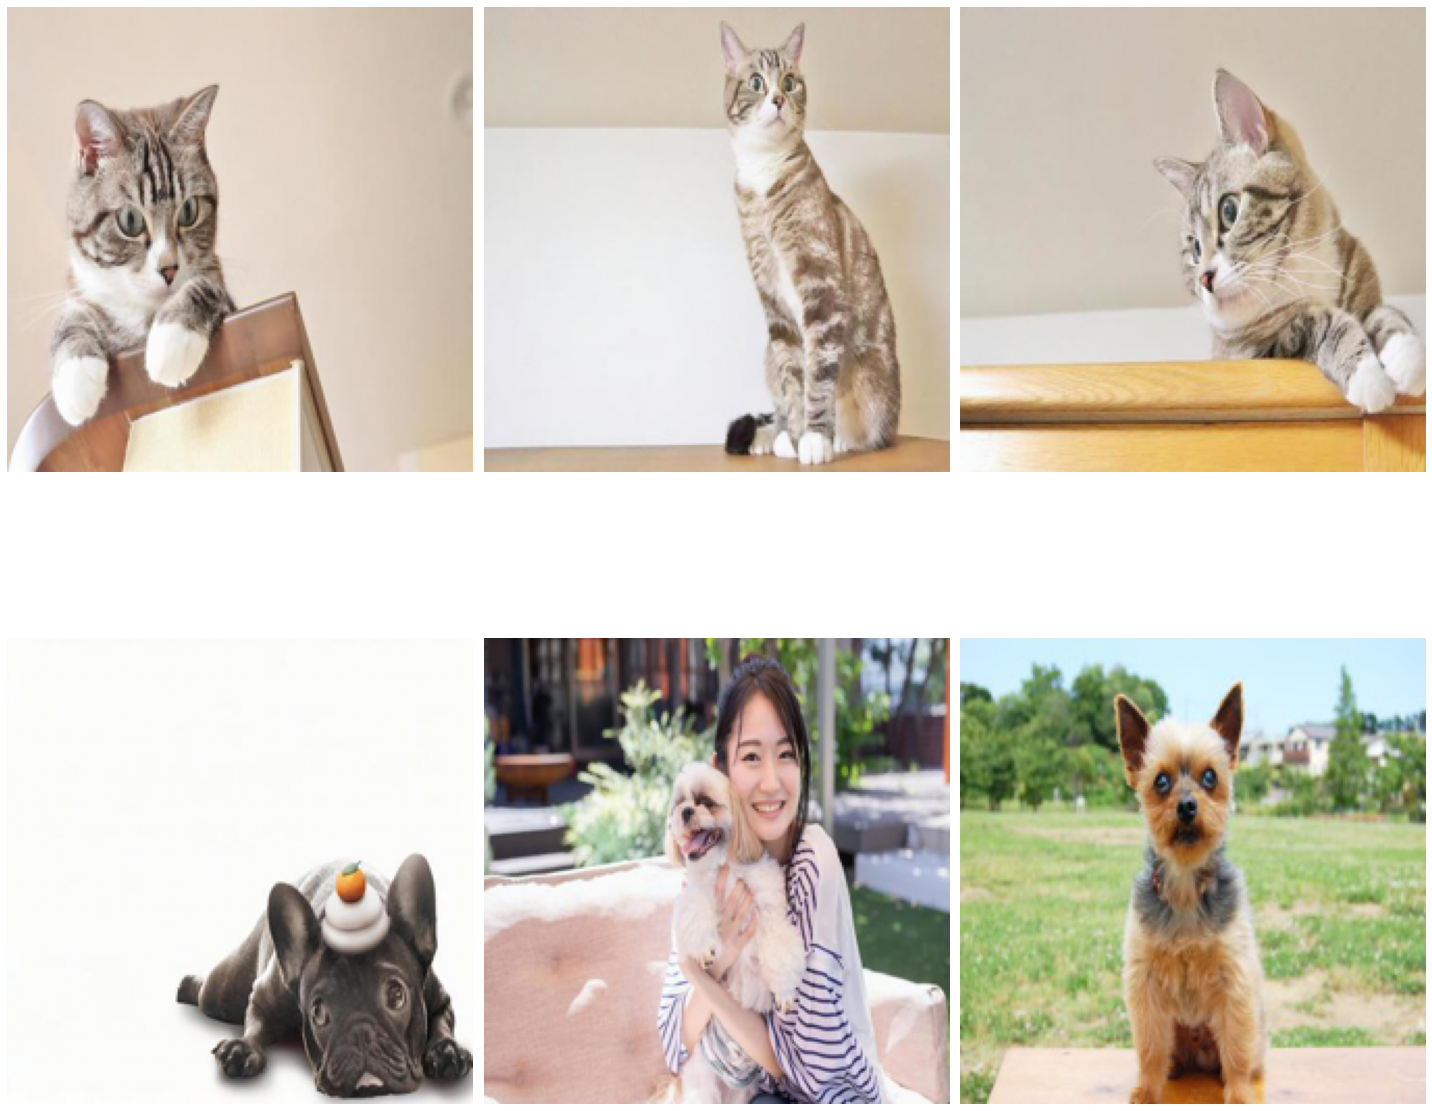

In [ ]:
plotImages(X_train)

In [ ]:
# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 2, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

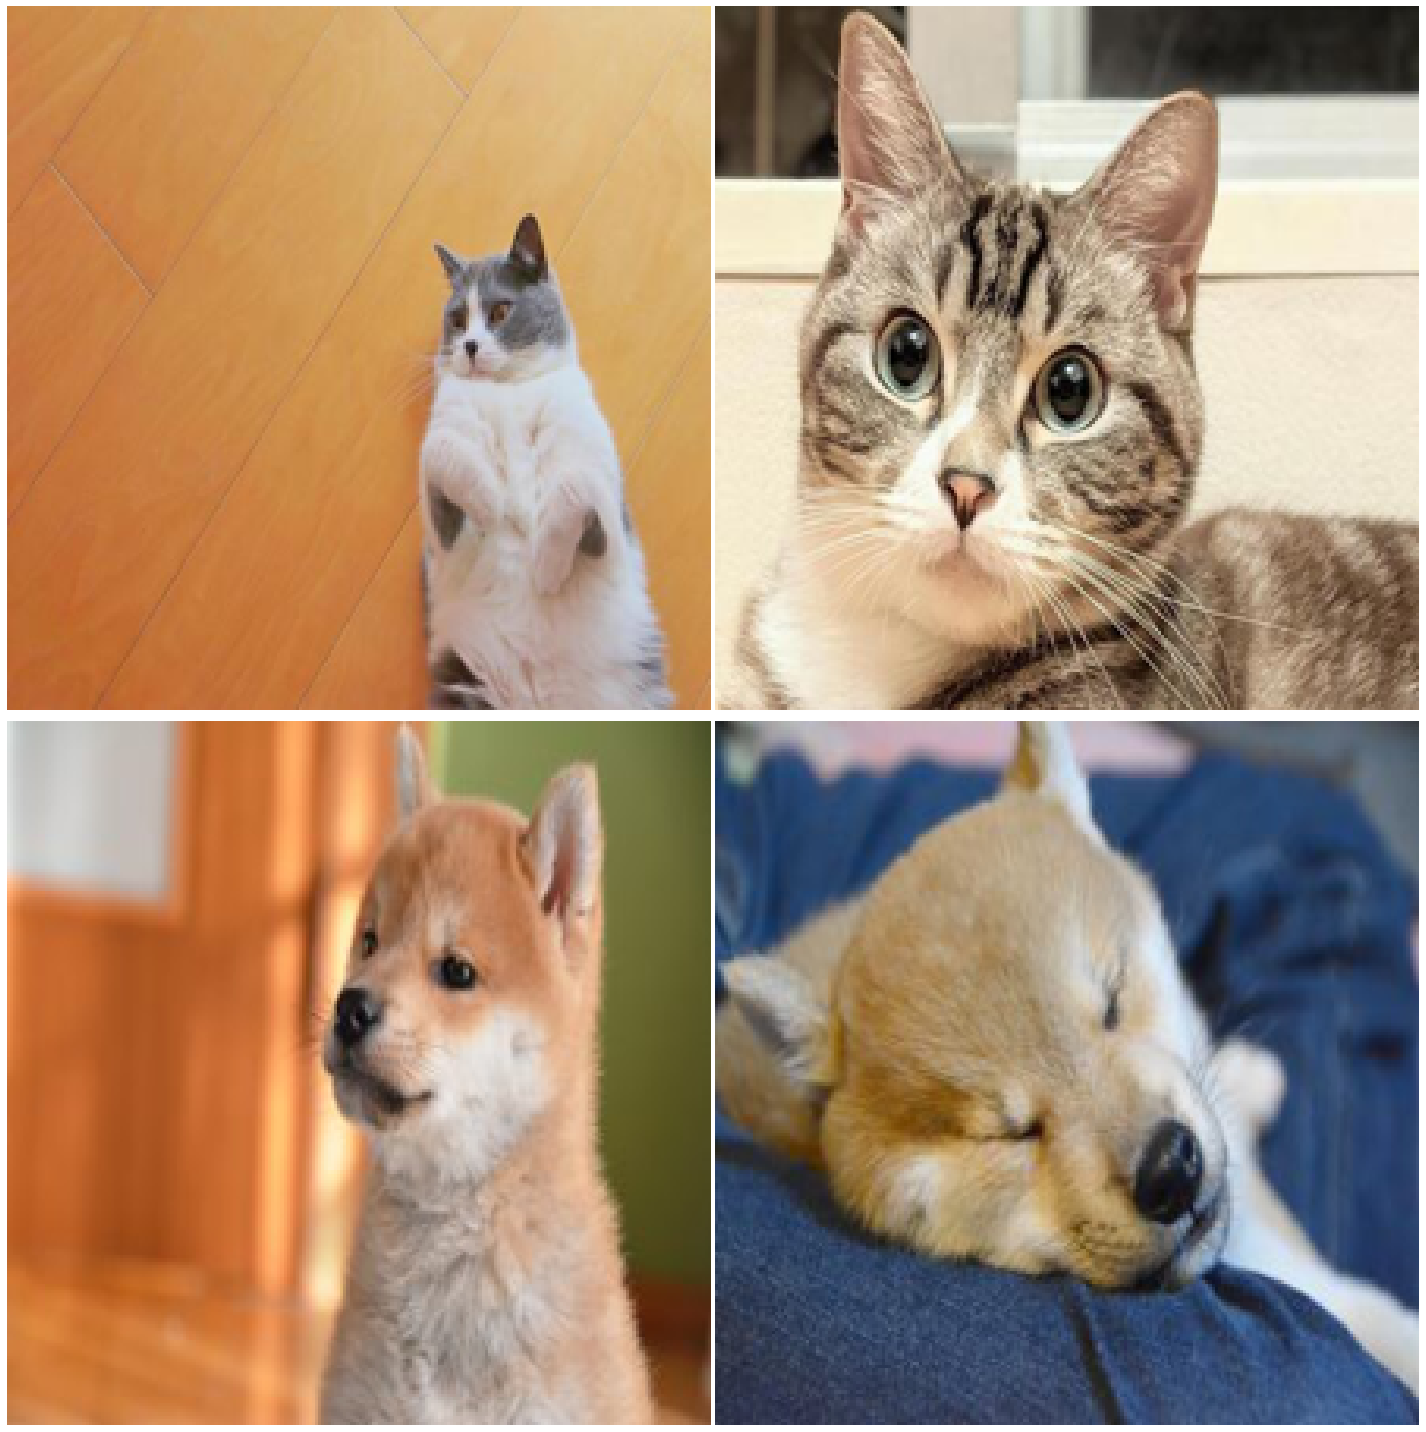

In [ ]:
plotImages(X_val)

In [ ]:
def get_callbacks(filepath, patience=5):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]

10.モデルの構築

モデルはmax pooling層を伴う3つの畳み込みブロックからなります。さらに relu 活性化関数によるアクティベーションを伴う512ユニットの\
全結合層があります。モデルは、シグモイド活性化関数による2値分類に基づいてクラスに属する確率を出力します。

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

11.モデルのコンパイル

このチュートリアルでは、 ADAM オプティマイザーと binary cross entropy 損失関数を選択します。各学習エポックの学習と検証の精度を\
表示するために、metrics 引数を渡します。

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
file_path = '.model_weights.hdf5'
callbacks = get_callbacks(filepath=file_path, patience=10)

12.モデルの概要

すべてのネットワークのレイヤーを見るには、モデルの summary メソッドを利用します:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

13.モデルの学習

ImageDataGenerator クラスの fit_generator メソッドを使用して、ネットワークを学習します。

In [ ]:
print('fitting....')
history = model.fit(X_train, y_train, epochs=30,
          validation_data=(X_val, y_val), batch_size=1)

fitting....
Epoch 1/30
6/6 [==============================] - 5s 745ms/step - loss: 4.9357 - accuracy: 0.2357 - val_loss: 1.3621 - val_accuracy: 0.5000
Epoch 2/30
6/6 [==============================] - 1s 218ms/step - loss: 0.7469 - accuracy: 0.6524 - val_loss: 0.7247 - val_accuracy: 0.5000
Epoch 3/30
6/6 [==============================] - 1s 219ms/step - loss: 0.7390 - accuracy: 0.4667 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 4/30
6/6 [==============================] - 1s 211ms/step - loss: 0.6958 - accuracy: 0.3905 - val_loss: 0.6845 - val_accuracy: 0.7500
Epoch 5/30
6/6 [==============================] - 1s 216ms/step - loss: 0.6886 - accuracy: 0.5333 - val_loss: 0.6737 - val_accuracy: 0.5000
Epoch 6/30
6/6 [==============================] - 1s 218ms/step - loss: 0.6138 - accuracy: 0.8119 - val_loss: 0.6569 - val_accuracy: 1.0000
Epoch 7/30
6/6 [==============================] - 1s 202ms/step - loss: 0.5288 - accuracy: 0.9524 - val_loss: 0.6200 - val_accuracy: 0.5000
Epoch 8/

14.学習結果の可視化

In [ ]:
print("Train evaluate:")
print(model.evaluate(X_train, y_train, verbose=1, batch_size=1))
print("####################")
print("watch list evaluate:")
print(model.evaluate(X_val, y_val, verbose=1, batch_size=1))
# Any results you write to the current directory are saved as output.

Train evaluate:
6/6 [==============================] - 0s 32ms/step - loss: 7.5741e-07 - accuracy: 1.0000
[7.574119536002399e-07, 1.0]
####################
watch list evaluate:
4/4 [==============================] - 0s 25ms/step - loss: 1.4605 - accuracy: 0.7500
[1.4604506492614746, 0.75]


### 【問題2】分類データセットに対するデータ拡張

17.データの拡張と可視化

18.水平反転の適用

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 6 images belonging to 2 classes.


学習サンプルから1つのサンプル画像を取得する作業を5回繰り返して、おなじ画像に5回データ拡張が適用されるようにします。

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

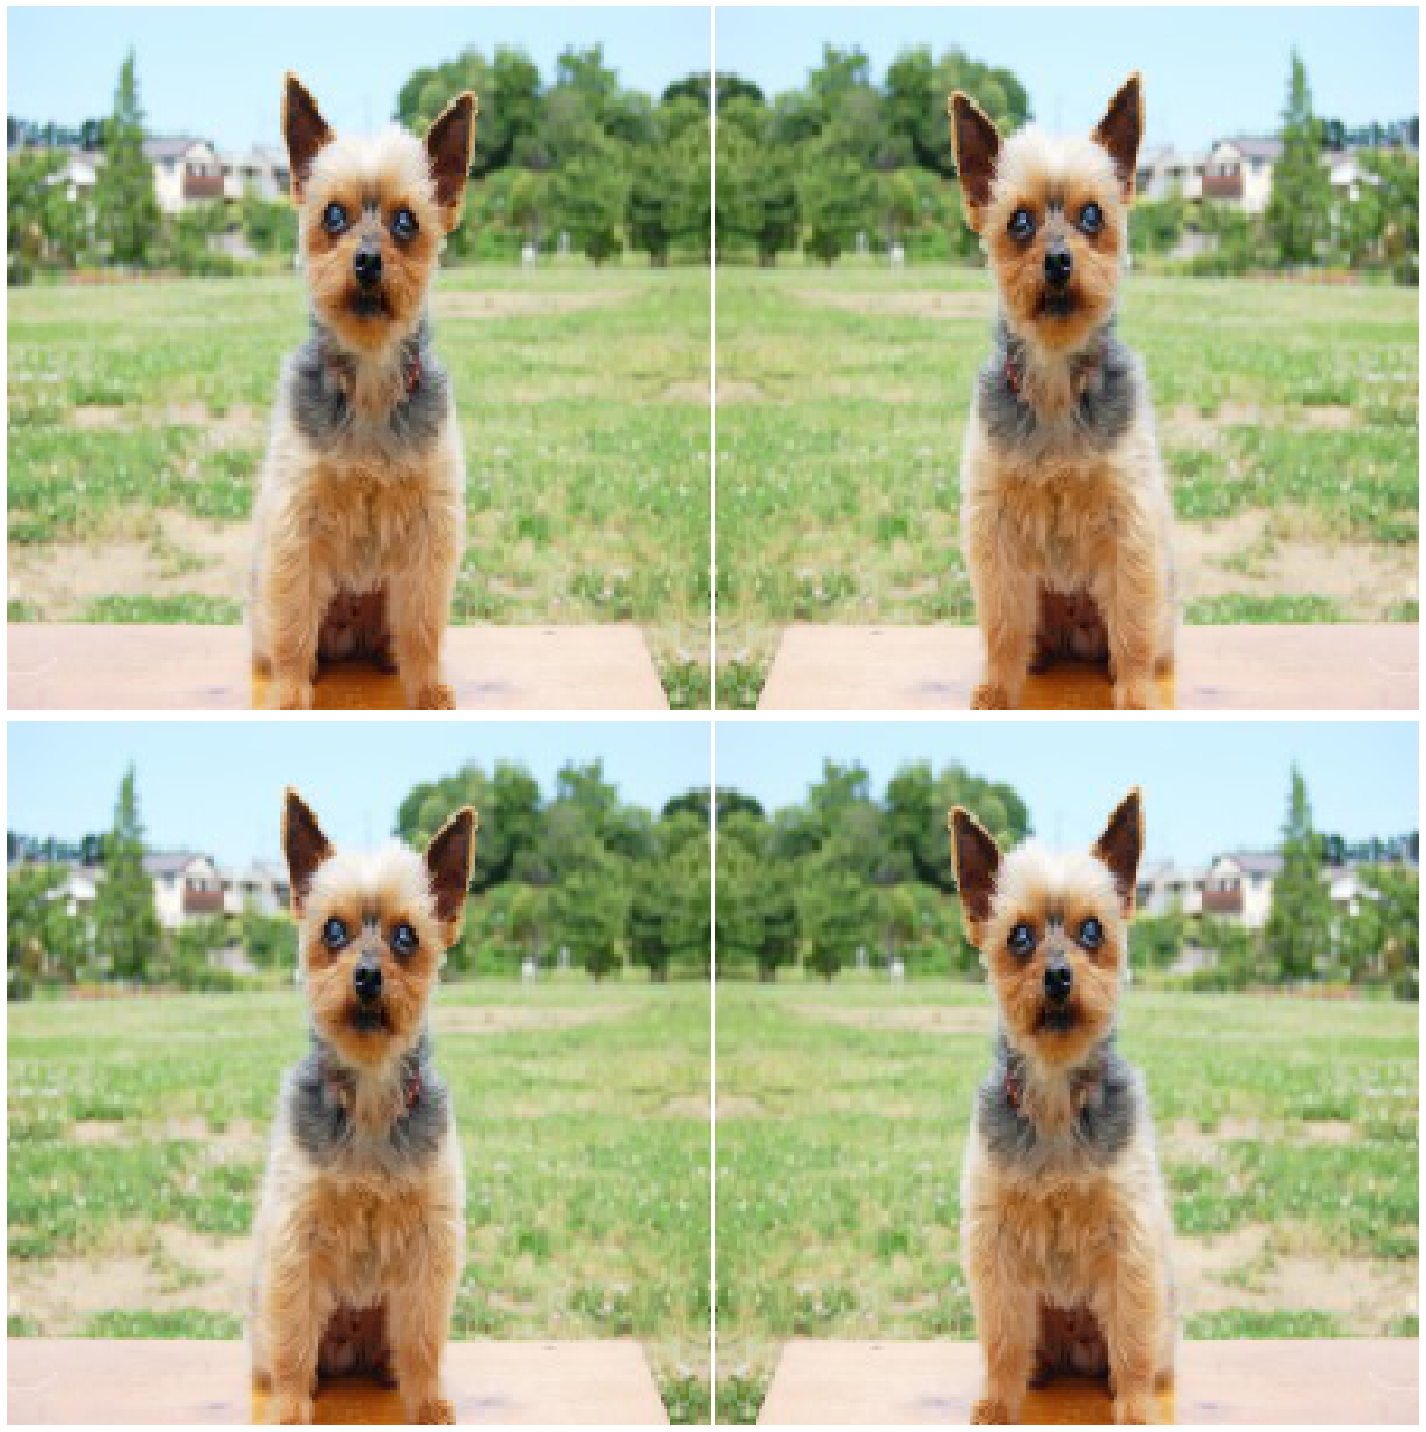

In [ ]:
# 上で学習用画像の可視化のために定義、使用されたおなじカスタムプロット関数を再利用する
plotImages(augmented_images)

19.すべてのデータ拡張を同時に利用する

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 6 images belonging to 2 classes.


一つの画像に対して5回の個別の適用を行った際にそれぞれどのように見えるかを可視化。

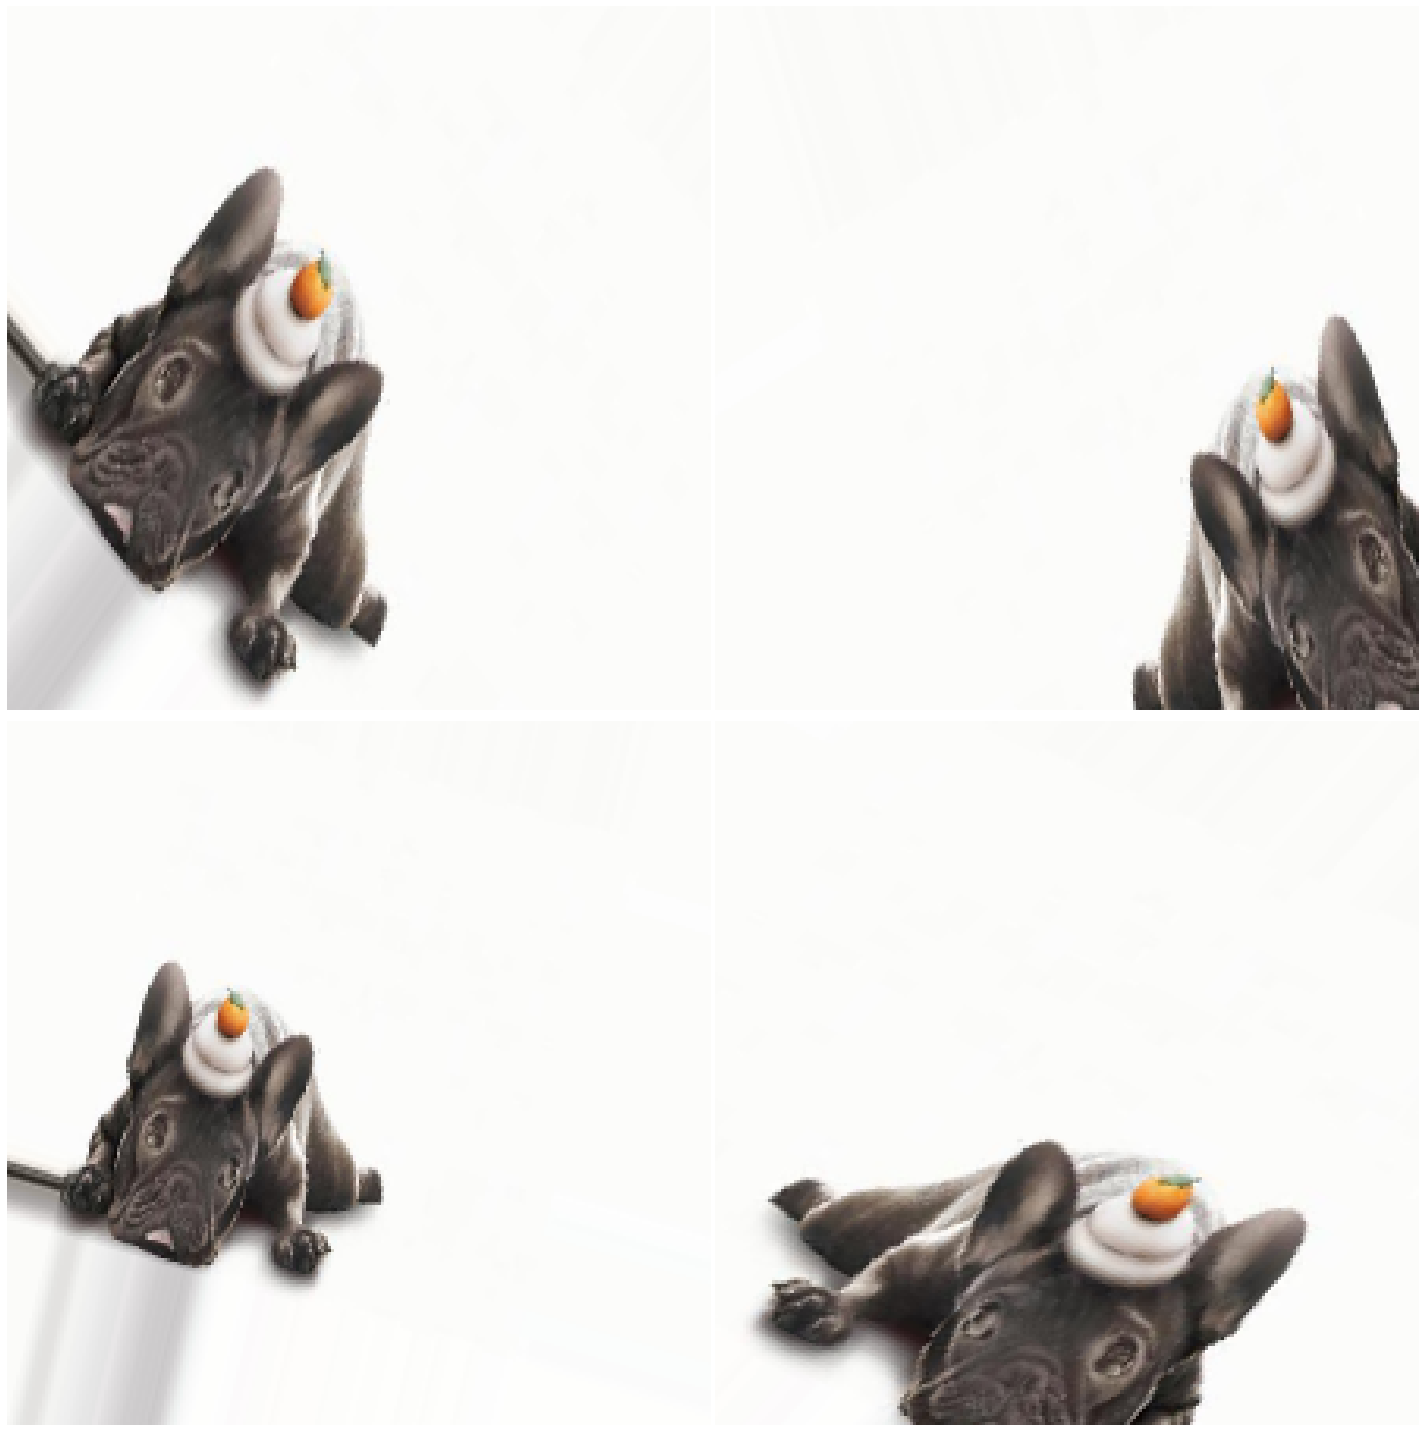

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

20.検証データジェネレータの構築

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 4 images belonging to 2 classes.


21.ドロップアウト（dropout）

22.ドロップアウトを追加した新しいネットワークの構築

In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

23.モデルのコンパイル

ネットワークにドロップアウトを導入した後、モデルをコンパイルし、レイヤーの概要を表示します。

In [ ]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)       

24.モデルの学習

学習サンプルにデータ拡張を導入し、ネットワークにドロップアウトを追加した後、この新しいネットワークを学習します:

In [ ]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15


C:\Users\es\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


6/6 [==============================] - 4s 426ms/step - loss: 17.4919 - accuracy: 0.4214 - val_loss: 1.0267 - val_accuracy: 0.5000
Epoch 2/15
6/6 [==============================] - 2s 248ms/step - loss: 1.6291 - accuracy: 0.5024 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/15
6/6 [==============================] - 1s 237ms/step - loss: 0.7066 - accuracy: 0.4976 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 4/15
6/6 [==============================] - 1s 219ms/step - loss: 0.6927 - accuracy: 0.5619 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/15
6/6 [==============================] - 1s 222ms/step - loss: 0.6887 - accuracy: 0.7643 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 6/15
6/6 [==============================] - 1s 218ms/step - loss: 0.7007 - accuracy: 0.2357 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 7/15
6/6 [==============================] - 1s 218ms/step - loss: 0.6950 - accuracy: 0.4190 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 8/15
6/6 [==============

25.モデルの可視化

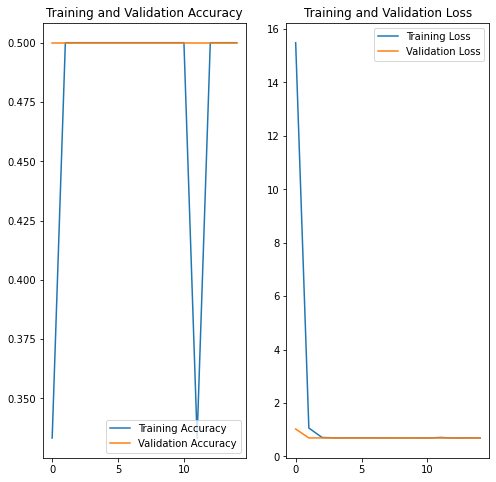

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_dir = os.path.join(PATH, 'test')

In [ ]:
img_list_test = glob.glob(test_dir + '/*' + ".jpg")

In [ ]:
img_list_test

['C:/Users/es/Documents/Python Scripts/3.Mar/dataset/test\\cat_1.jpg',
 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/test\\cat_2.jpg',
 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/test\\cat_3.jpg',
 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/test\\dog_1.jpg',
 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/test\\dog_2.jpg',
 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/test\\dog_3.jpg',
 'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/test\\dog_4.jpg']

In [ ]:
# 検証用のイメージリストを作成する。

IMG_HEIGHT = 224
IMG_WIDTH = 224
test_img_array = np.empty((0,224,224,3))

for img in img_list_test:
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        test_img_array = np.concatenate([test_img_array, cat_img], axis = 0)
        
        cat_img_.close()

for img in img_list_v_dogs:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        test_img_array = np.concatenate([test_img_array, dog_img], axis = 0)
        
        dog_img_.close()

In [ ]:
X_test = test_img_array

In [ ]:
predicted_test = model.predict(X_test)

In [ ]:
predicted_test

array([[0.99592805],
       [0.00818098],
       [0.04496348],
       [0.00314549],
       [0.94294304]], dtype=float32)

### 【問題3】物体検出データセットの用意

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(f'C:/Users/es/Documents/Python Scripts/3.Mar/dataset/400by400/cat1.xml')

In [ ]:
df

,<annotation>
0,\t<folder>400by400</folder>
1,\t<filename>cat1.jpg</filename>
2,\t<path>C:\Users\es\Documents\Python Scripts\3...
3,\t<source>
4,\t\t<database>Unknown</database>
5,\t</source>
6,\t<size>
7,\t\t<width>400</width>
8,\t\t<height>400</height>
9,\t\t<depth>3</depth>


### 【問題4】物体検出データセットに対するデータ拡張

In [ ]:
## Installation
!pip install -U albumentations

Requirement already up-to-date: albumentations in c:\users\es\anaconda3\lib\site-packages (0.5.2)


In [ ]:
# Step 1. Import the required libraries.
import albumentations as A
import cv2

In [ ]:
# Step 2. Define an augmentation pipeline.
transform = A.Compose([
    A.RandomCrop(width=224, height=224),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='albumentations', min_area=1024, min_visibility=0.1, label_fields=['cat']))

In [ ]:
# Step 3. Read images and bounding boxes from the disk.
image = cv2.imread("C:/Users/es/Documents/Python Scripts/3.Mar/dataset/400by400/cat1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
image

array([[[221, 207, 194],
        [221, 207, 194],
        [221, 207, 194],
        ...,
        [196, 180, 165],
        [195, 179, 164],
        [194, 178, 163]],

       [[221, 207, 194],
        [221, 207, 194],
        [221, 207, 194],
        ...,
        [196, 180, 165],
        [195, 179, 164],
        [194, 178, 163]],

       [[221, 207, 194],
        [221, 207, 194],
        [221, 207, 194],
        ...,
        [196, 180, 165],
        [195, 179, 164],
        [194, 178, 163]],

       ...,

       [[201, 197, 186],
        [235, 233, 221],
        [252, 252, 242],
        ...,
        [224, 199, 168],
        [224, 199, 168],
        [224, 199, 168]],

       [[205, 203, 191],
        [242, 240, 228],
        [254, 254, 244],
        ...,
        [224, 199, 168],
        [224, 199, 168],
        [224, 199, 168]],

       [[208, 206, 194],
        [246, 244, 232],
        [254, 254, 244],
        ...,
        [224, 199, 168],
        [224, 199, 168],
        [224, 199, 168]]

In [ ]:
# Step 4. Pass an image and bounding boxes to the augmentation pipeline and receive augmented images and boxes.
bboxes = [[14, 61, 209, 367]]

In [ ]:
img = cv2.rectangle(image ,(14, 61),(209,367),(0,255,0),20)

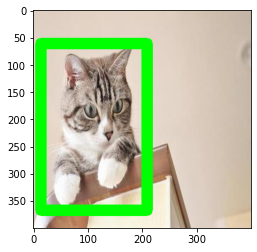

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
img.shape

(400, 400, 3)

In [ ]:
img = img.reshape(1,400,400,3)

In [ ]:
img.shape

(1, 400, 400, 3)

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
batch_size=1
train_data_gen = image_gen_train.flow(img, batch_size=1)

In [ ]:
augmented_images = [train_data_gen]
plotImages(augmented_images)